In [1]:
from scipy.fftpack import fft, ifft
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("done")

done


In [2]:
#load the data
#import pandas as pd 
data = pd.read_csv("/home/user/Downloads/BeePredictor-Derek_Private/data/cleaned/schwartau/schwartau.csv") 
data.tail()

,flow,arrivals,departures,temperature,timestamp
83779,-516,2327,2843,34.946,2019-05-31 13:15:00
83780,-188,3158,3346,35.048,2019-05-31 13:30:00
83781,1040,3167,2127,34.864,2019-05-31 13:45:00
83782,138,2308,2170,34.702,2019-05-31 14:00:00
83783,-940,2278,3218,34.570,2019-05-31 14:15:00


In [3]:
#puts the data into an array
dataArray = data["flow"].tolist()
dataTime = data["timestamp"].tolist()
print(len(dataArray))

83784


378
562.449214374837
8.338467863634316e-09


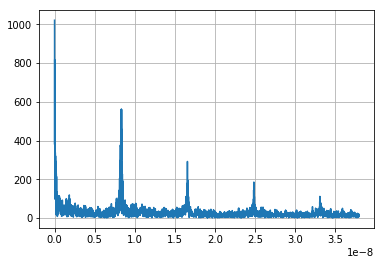

In [4]:
#finds the y values
N = 8000 #number choosen to cut hou much of the y axis is shown
yf = fft(dataArray) #the fast fourie transformation
yg = 2.0/N * np.abs(yf[0:N//2]) #adjusted to show on a graph

#Makes the x axis. this is somewhat arbitrary and I cant make it useful
res = 83784 * 15 #the number that makes the x axis
x = np.linspace(0, 1/res, len(dataArray))
xg = x[:N//2]

#Finds local maximun location and value withing the start and end value
sta = 500
end = 4000
maxVal = np.argmax(yg[sta:end])
print(maxVal)           #value
print(yg[(maxVal+sta)]) #location in array
print(xg[maxVal+sta])   #value location on the x axis

#plots the data
plt.plot(xg,yg)
plt.grid()
plt.show()
#plt.savefig('fft.png')


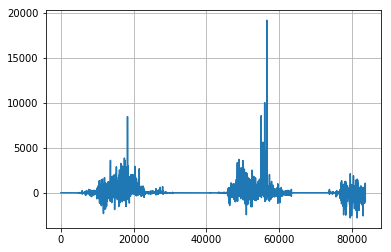

In [5]:
plt.plot(dataArray)
#xs = np.linspace(0.0, 83784, len(dataArray))
plt.grid()
plt.show()

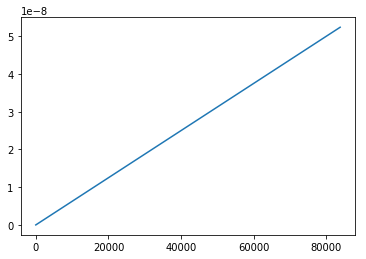

In [17]:
fs = 83784 # sample rate 
f =  8.338467863634316e-09 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = np.sin(2*np.pi*f * (x/fs)) 

#this instruction can only be used with IPython Notbook. 
% matplotlib inline
# showing the exact location of the smaples
#plt.stem(x,y, 'r', )
plt.plot(x,y)


In [9]:
#make data subset, used for debugging
dataArray = dataArray[:15000]
print(len(dataArray))

15000


In [10]:
#makes a simple sin wave, also used for debugging
#x = np.linspace(0.0, 83784, len())
dataArray = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
print(len(np.sin(50.0 * 2.0*np.pi*x)))

83784


4000
4000


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


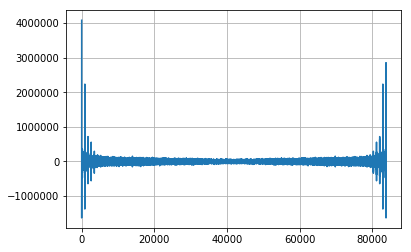

In [5]:
#6000, 800
#83784,83784

#same as above, but used for testing
#currently shows the whole data plotted and unadjusted. 

# Number of sample points
N = 8000
# sample spacing
T = 1.0 / 400.0

y = dataArray #np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

ys = 2.0/N * np.abs(yf[0:N//2])

xf = np.linspace(0.0, N//2, N//2)

#print(len(y))
#print(yf)
#print(N//2)
#print(x)
#print(xf)
print(len(ys))
print(len(dataTime[0:N//2]))

plt.plot(yf)
plt.grid()
plt.show()

In [16]:
#More print statements used for testing
print(len(ys))
print(np.amax(ys[3200:]))
print(np.argmax(ys[3200:]))
print(ys[3486])
print(np.sum(dataArray))
print(np.sum(ys))

4000
111.43888834561001
286
111.43888834561001
4083929
120161.4626290611


600


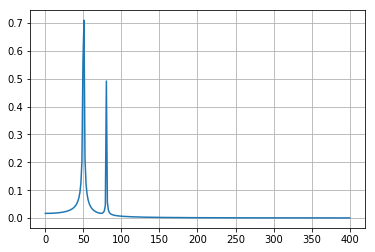

In [39]:
#sample fft code
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
print(len(y))
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)\

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

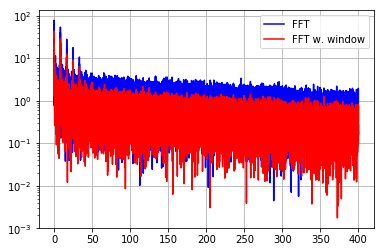

In [7]:
#more sample fft code
from scipy.fftpack import fft
# Number of sample points
N = 83784
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = dataArray
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

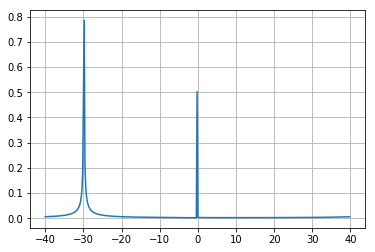

In [174]:
#more sample fft code
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 80.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [4]:
#more testing
import numpy as np
T = 1.0 / 80.0
N = 400
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
print(len(y))

400


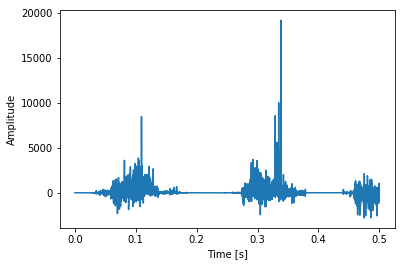

Value at index 0:	(-1223190.9575248584-901217.4645416916j) 
Value at index 83783:	(-1223190.9575248584+901217.4645416915j)
Value at index 1:	(-1632065.7543034605-2837281.534724624j) 
Value at index 83782:	(-1632065.7543034605+2837281.534724624j)


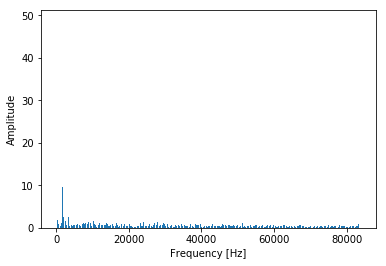

In [90]:
#more testing
t = np.linspace(0, 0.5, 83784)
s = dataArray #np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

fft = np.fft.fft(s)


for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))


fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = len(s)

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()